In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Dataset shape :- \n", df.shape)

Dataset shape :- 
 (284807, 31)


In [5]:
df.drop('Time', axis=1, inplace=True)

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
fraud_count = len(df[df.Class == 0])
nonfraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count)*100

print('Cases')
print('---------------------------')
print('Total Fraud_count is:-', fraud_count)
print('Total Non-Fraud_count is:-', nonfraud_count)

Cases
---------------------------
Total Fraud_count is:- 284315
Total Non-Fraud_count is:- 492


In [8]:
false = df[df['Class']==1]
true = df[df['Class']==0]

#false detection case

print('False Detection Class')
print("---------------------")
print(false.Amount.describe(), "\n")

#true detection case

print('False Detection Class')
print("---------------------")
print(true.Amount.describe(), "\n")

False Detection Class
---------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

False Detection Class
---------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 



In [9]:
#check columns

print("Columns or Feature names :-", df.columns)

Columns or Feature names :- Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [10]:
#check unique values of target variable

print("Unique values of target variable :-", df['Class'].unique())

Unique values of target variable :- [0 1]


The target variable Class has 0 and 1 values. Here

* 0 for **non-fraudulent** transactions
* 1 for **fraudulent** transactions

In [11]:
#check number of samples under target column

print("Number of sample under each target value :- \n",df['Class'].value_counts())

Number of sample under each target value :- 
 0    284315
1       492
Name: Class, dtype: int64


In [12]:
#Checking null values

df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Transformation

In [13]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [14]:
print(df['Amount'].head())

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


## Splitting Dataset

In [15]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [17]:
print('X_train Samples :-', X_train[:1])

X_train Samples :- [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]


In [18]:
print('X_test Samples :-', X_train[0:1])

X_test Samples :- [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]


In [19]:
print('y_train Samples :-', y_train[0:20])

y_train Samples :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
print('y_test Samples :-', y_test[0:20])

y_test Samples :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
print('Shape of X_Train dataset')
print('----------------------')
print(X_train.shape)

print('Shape of y_Train dataset')
print('----------------------')
print(y_train.shape)


print('Shape of X_Test dataset')
print('----------------------')
print(X_test.shape)

print('Shape of y_Test dataset')
print('----------------------')
print(y_test.shape)


Shape of X_Train dataset
----------------------
(227845, 29)
Shape of y_Train dataset
----------------------
(227845,)
Shape of X_Test dataset
----------------------
(56962, 29)
Shape of y_Test dataset
----------------------
(56962,)


## Modeling

1. Decision Tree

In [22]:
tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [23]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the decision tree', (accuracy_score(y_test, tree_pred)))

-----------Accuracy Score-----------
Accuracy score of the decision tree 0.9993504441557529


In [24]:
print('-----------F1 Score-----------')
print('F1 score of the decision tree', (f1_score(y_test, tree_pred)))

-----------F1 Score-----------
F1 score of the decision tree 0.8


In [25]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the decision tree :- \n', (confusion_matrix(y_test, tree_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the decision tree :- 
 [[56851    10]
 [   27    74]]


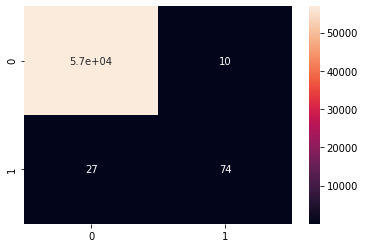

In [26]:
cm = confusion_matrix(y_test, tree_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

In [27]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the decision tree :- \n', (classification_report(y_test, tree_pred)))

-----------Classification Report-----------
Confusion Matrix of the decision tree :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.73      0.80       101

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



2. KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [29]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the KNN', (accuracy_score(y_test, knn_pred)))

-----------Accuracy Score-----------
Accuracy score of the KNN 0.9995259997893332


In [30]:
print('-----------F1 Score-----------')
print('F1 score of the KNN', (f1_score(y_test, knn_pred)))

-----------F1 Score-----------
F1 score of the KNN 0.8571428571428572


In [31]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the KNN :- \n', (confusion_matrix(y_test, knn_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the KNN :- 
 [[56854     7]
 [   20    81]]


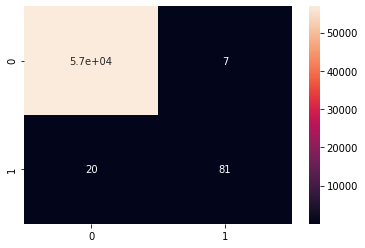

In [32]:
cm = confusion_matrix(y_test, knn_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

In [33]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the KNN :- \n', (classification_report(y_test, knn_pred)))

-----------Classification Report-----------
Confusion Matrix of the KNN :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



3. Logistic Regression

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [35]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Logistic Regression', (accuracy_score(y_test, lr_pred)))

-----------Accuracy Score-----------
Accuracy score of the Logistic Regression 0.9991924440855307


In [36]:
print('-----------F1 Score-----------')
print('F1 score of the logistic regression', (f1_score(y_test, lr_pred)))

-----------F1 Score-----------
F1 score of the logistic regression 0.7356321839080459


In [37]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the logistic regression :- \n', (confusion_matrix(y_test, lr_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the logistic regression :- 
 [[56852     9]
 [   37    64]]


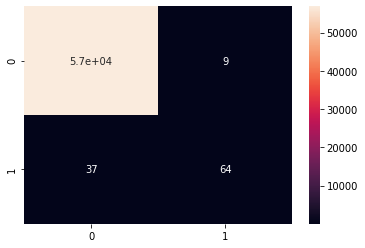

In [38]:
cm = confusion_matrix(y_test, lr_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

In [39]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the logistic regression :- \n', (classification_report(y_test, lr_pred)))

-----------Classification Report-----------
Confusion Matrix of the logistic regression :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [41]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Random Forest', (accuracy_score(y_test, rf_pred)))

-----------Accuracy Score-----------
Accuracy score of the Random Forest 0.9994908886626171


In [42]:
print('-----------F1 Score-----------')
print('F1 score of the random forest', (f1_score(y_test, rf_pred)))

-----------F1 Score-----------
F1 score of the random forest 0.8449197860962566


In [43]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the random forest :- \n', (confusion_matrix(y_test, rf_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the random forest :- 
 [[56854     7]
 [   22    79]]


In [44]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the random forest :- \n', (classification_report(y_test, rf_pred)))

-----------Classification Report-----------
Confusion Matrix of the random forest :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## ROC - AUC Curve

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

1. Decision Tree

In [46]:
score = roc_auc_score(y_test, tree_pred)

In [47]:
print('ROC-AUC Score is:-', score)

ROC-AUC Score is:- 0.8662486999302276


In [48]:
fpr, tpr, thresholds = roc_curve(y_test, tree_pred)

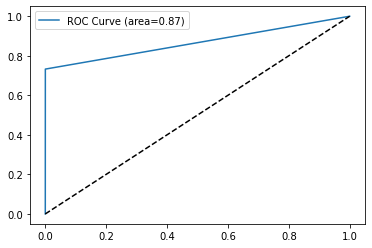

In [49]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

2. Random Forest

In [50]:
rf_score = roc_auc_score(y_test, rf_pred)

In [51]:
print('ROC-AUC Score is:-', rf_score)

ROC-AUC Score is:- 0.891027555297694


In [52]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

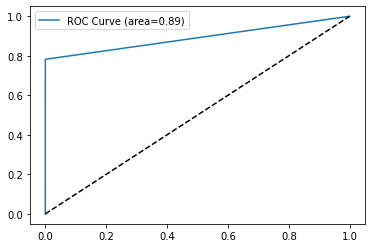

In [53]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % rf_score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()